# Marker gene hunt scripts

In [6]:
import datajoint as dj
dj.config.load('/Users/neurozmar/Secrets/dj_local_conf_NDNF_behavior.json')
dj.conn()

[2026-01-08 13:43:42,296][INFO]: DataJoint is configured from /Users/neurozmar/Secrets/dj_local_conf_NDNF_behavior.json


DataJoint connection (disconnected) rozmar@cs16-datajoint.koki.local:3306

## import packages

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from ndnf_pipeline import lab, experiment
import numpy as np
from datetime import datetime

Text(0.5, 1.0, 'Are mice ready for perfusion?')

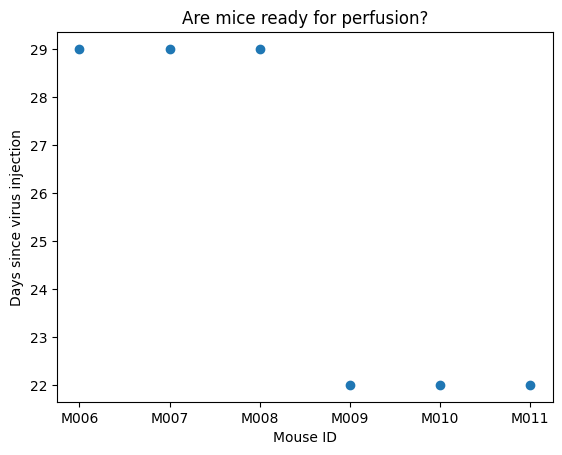

In [ ]:
# plot days since virus injection for all mice
mouse,inj_date = (lab.Surgery()*lab.Surgery.VirusInjection).fetch('subject_id','date')
injection_dict = {}
mice= []
inj_time_since = []
for m in np.unique(mouse):
    inj_dates = inj_date[mouse==m]
    injection_dict[m]={'time_since_injection':datetime.today().date()-np.min(inj_dates)
}
    mice.append(m)
    inj_time_since.appendß(injection_dict[m]['time_since_injection'].days)
plt.plot(mice,inj_time_since,'o')
plt.xlabel('Mouse ID')
plt.ylabel('Days since virus injection')
plt.title('Are mice ready for perfusion?')

/var/folders/t0/71r1kjy974g849pxq5s1zmfh0000gn/T/ipykernel_26889/2670599570.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot = df.pivot_table(


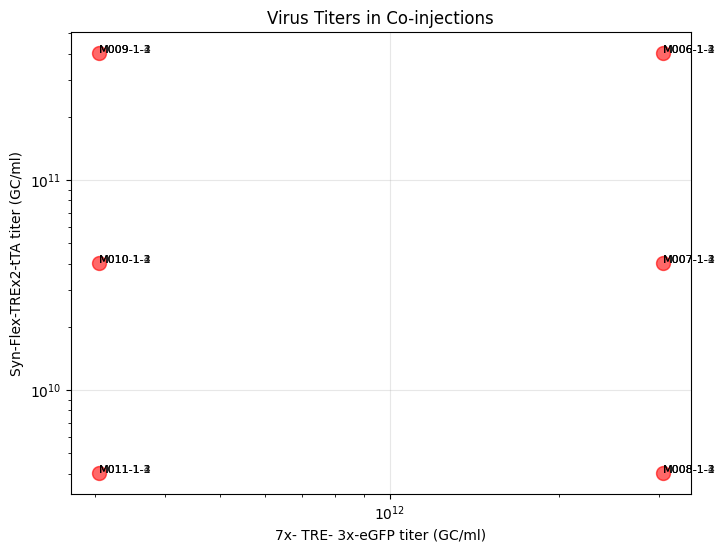

In [11]:
# plot virus co-injections

# Get all virus injections with their components and virus names
query = (lab.Surgery.VirusInjection * 
         lab.Surgery.VirusComponent * 
         lab.Virus)

data = query.fetch('subject_id', 'surgery_id', 'injection_id', 
                   'virus_name', 'effective_titer', as_dict=True)
df = pd.DataFrame(data)

# Pivot to wide format (one row per injection, one column per virus name)
pivot = df.pivot_table(
    index=['subject_id', 'surgery_id', 'injection_id'],
    columns='virus_name',
    values='effective_titer',
    fill_value=0
)

# Plot first two viruses
if len(pivot.columns) >= 2:
    virus1, virus2 = pivot.columns[0], pivot.columns[1]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(pivot[virus1], pivot[virus2], alpha=0.2, s=100,color='red')
    plt.xlabel(f'{virus1} titer (GC/ml)')
    plt.ylabel(f'{virus2} titer (GC/ml)')
    plt.title('Virus Titers in Co-injections')
    plt.grid(True, alpha=0.3)
    plt.xscale('log')
    plt.yscale('log')
    
    # Add labels for each point
    for idx, row in pivot.iterrows():
        if row[virus1] > 0 or row[virus2] > 0:
            plt.annotate(f'{idx[0]}-{idx[1]}-{idx[2]}', 
                        (row[virus1], row[virus2]),
                        fontsize=8, alpha=0.7)
    
    plt.show()